# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from citipy import citipy
from api_keys import weather_api_key
from scipy.stats import linregress
import scipy.stats as st


In [2]:
api_key = weather_api_key
city_name = "London"
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={api_key}&units=Imperial"



In [3]:
requests.get(url+"&q="+city_name).json()

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 72.81,
  'feels_like': 72.52,
  'temp_min': 68.7,
  'temp_max': 76.05,
  'pressure': 1012,
  'humidity': 58},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 220},
 'clouds': {'all': 40},
 'dt': 1629035835,
 'sys': {'type': 2,
  'id': 2006068,
  'country': 'GB',
  'sunrise': 1629002776,
  'sunset': 1629055436},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

## Generate Cities List

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

print(cities)




615
['kaitangata', 'zaysan', 'zhetybay', 'bengkulu', 'esperance', 'nouadhibou', 'guanare', 'albany', 'nikolskoye', 'bereda', 'meadow lake', 'bluff', 'port alfred', 'ushuaia', 'bandarbeyla', 'asau', 'ahipara', 'coquimbo', 'vaini', 'busselton', 'broome', 'cape town', 'faanui', 'puerto ayora', 'louisbourg', 'miastko', 'rock sound', 'mataura', 'soddy-daisy', 'torbay', 'port-gentil', 'karaul', 'port elizabeth', 'qarqin', 'qaanaaq', 'chokurdakh', 'jatara', 'sassandra', 'hobyo', 'fenoarivo', 'tsihombe', 'conakry', 'kisaran', 'jamestown', 'cap malheureux', 'ponta do sol', 'airai', 'new norfolk', 'rikitea', 'dikson', 'chuy', 'pevek', 'dryden', 'peniche', 'cabo san lucas', 'haysyn', 'arraial do cabo', 'mount gambier', 'bira', 'victoria', 'ballina', 'ures', 'cayenne', 'kapaa', 'meulaboh', 'yulara', 'saskylakh', 'birao', 'magna', 'bilibino', 'saint anthony', 'japura', 'punta arenas', 'lavrentiya', 'faya', 'naze', 'hobart', 'vrangel', 'puksoozero', 'ulaangom', 'souillac', 'sentyabrskiy', 'thap than

In [5]:
requests.get(url).json()

{'cod': '400', 'message': 'Nothing to geocode'}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()    
    
    try:
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City Not Found, Skip")

Processing record 1|kaitangata
Processing record 2|zaysan
City Not Found, Skip
Processing record 3|bengkulu
Processing record 4|esperance
Processing record 5|nouadhibou
Processing record 6|guanare
Processing record 7|albany
Processing record 8|nikolskoye
Processing record 9|bereda
Processing record 10|meadow lake
Processing record 11|bluff
Processing record 12|port alfred
Processing record 13|ushuaia
Processing record 14|bandarbeyla
Processing record 15|asau
Processing record 16|ahipara
Processing record 17|coquimbo
Processing record 18|vaini
Processing record 19|busselton
Processing record 20|broome
Processing record 21|cape town
Processing record 22|faanui
Processing record 23|puerto ayora
City Not Found, Skip
Processing record 24|miastko
Processing record 25|rock sound
Processing record 26|mataura
Processing record 27|soddy-daisy
Processing record 28|torbay
Processing record 29|port-gentil
City Not Found, Skip
Processing record 30|port elizabeth
Processing record 31|qarqin
Processin

Processing record 256|fortuna
Processing record 257|kruisfontein
Processing record 258|wetaskiwin
Processing record 259|muscat
Processing record 260|hami
Processing record 261|port hedland
Processing record 262|goundam
Processing record 263|araouane
Processing record 264|yermakovskoye
Processing record 265|praya
Processing record 266|sokoni
City Not Found, Skip
Processing record 267|marathon
Processing record 268|los llanos de aridane
Processing record 269|tiznit
Processing record 270|maniitsoq
Processing record 271|gimli
Processing record 272|natal
Processing record 273|houma
Processing record 274|buala
Processing record 275|goroka
Processing record 276|srostki
Processing record 277|antsohihy
Processing record 278|evensk
Processing record 279|hare bay
Processing record 280|bronnoysund
Processing record 281|bathsheba
Processing record 282|mabaruma
City Not Found, Skip
Processing record 283|thompson
Processing record 284|hemsedal
Processing record 285|luoyang
Processing record 286|barab

Processing record 504|poum
Processing record 505|gubakha
Processing record 506|siavonga
Processing record 507|aquiraz
Processing record 508|mahon
Processing record 509|zaranj
Processing record 510|rio gallegos
Processing record 511|huilong
Processing record 512|bakel
Processing record 513|saint-georges
Processing record 514|gander
Processing record 515|dolores
Processing record 516|hastings
Processing record 517|santa fe
Processing record 518|porto santo
Processing record 519|ola
Processing record 520|arona
Processing record 521|parabel
Processing record 522|razole
Processing record 523|henties bay
Processing record 524|marsh harbour
Processing record 525|burnie
Processing record 526|plavinas
City Not Found, Skip
Processing record 527|srednekolymsk
Processing record 528|ayan
Processing record 529|bud
Processing record 530|haysville
Processing record 531|west bay
Processing record 532|bhander
Processing record 533|baherden
Processing record 534|nyagan
Processing record 535|panama city
P

In [7]:
city_df = pd.DataFrame({"City Name":city_name, "Cloudiness":cloudinesses, "Country":countries, "Date":dates, "Humidity":humidities,
                        "Latitude":lats,
                        "Longitude":lngs,
                        "Max Temp":max_temps,
                        "Wind Speed":wind_speeds
                                         })
city_df.head(10)

,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,London,45,NZ,1629035922,90,-46.2817,169.8464,40.87,5.39
1,London,40,KZ,1629035922,54,47.4667,84.8667,62.06,2.82
2,London,100,ID,1629035922,89,-3.8004,102.2655,77.18,3.47
3,London,0,AU,1629035923,81,-33.8667,121.9000,51.64,7.76
4,London,68,MR,1629035923,61,20.9310,-17.0347,82.38,11.50
5,London,99,VE,1629035923,100,9.0418,-69.7421,75.22,3.44
6,London,51,US,1629035880,66,42.6001,-73.9662,71.82,5.03
7,London,100,RU,1629035924,53,59.7035,30.7861,70.02,8.70
8,London,0,ES,1629035924,54,43.2686,-7.5406,78.15,6.55
9,London,95,US,1629035925,79,34.8014,-106.5436,67.69,1.14


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df.to_csv(index=False)
# Output File (CSV)
output_data_file = "weather_city_file.csv"
city_df.to_csv(output_data_file)



In [9]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City Name   574 non-null    object 
 1   Cloudiness  574 non-null    int64  
 2   Country     574 non-null    object 
 3   Date        574 non-null    int64  
 4   Humidity    574 non-null    int64  
 5   Latitude    574 non-null    float64
 6   Longitude   574 non-null    float64
 7   Max Temp    574 non-null    float64
 8   Wind Speed  574 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 40.5+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_df.sort_values(by='Humidity', ascending=False)



,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
142,London,90,AR,1629035973,100,-38.0023,-57.5575,42.82,5.75
89,London,75,CA,1629035954,100,62.4560,-114.3525,52.32,5.75
107,London,75,IS,1629035961,100,63.8424,-22.4338,53.56,12.66
5,London,99,VE,1629035923,100,9.0418,-69.7421,75.22,3.44
47,London,100,RU,1629035939,100,69.7008,170.3133,32.97,6.35
...,...,...,...,...,...,...,...,...,...
268,London,68,MA,1629036043,6,29.5833,-9.5000,109.26,4.59
495,London,40,MA,1629036134,6,34.0372,-4.9998,111.45,5.75
570,London,0,IR,1629036161,6,32.3811,48.4058,112.12,2.80
189,London,5,ML,1629035990,6,22.6783,-3.9836,116.08,13.06


In [11]:
clean_city_df = city_df[city_df['Humidity'] <= 99]
clean_city_df



,City Name,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,London,45,NZ,1629035922,90,-46.2817,169.8464,40.87,5.39
1,London,40,KZ,1629035922,54,47.4667,84.8667,62.06,2.82
2,London,100,ID,1629035922,89,-3.8004,102.2655,77.18,3.47
3,London,0,AU,1629035923,81,-33.8667,121.9000,51.64,7.76
4,London,68,MR,1629035923,61,20.9310,-17.0347,82.38,11.50
...,...,...,...,...,...,...,...,...,...
569,London,12,IR,1629036160,51,27.1467,57.0801,96.30,8.03
570,London,0,IR,1629036161,6,32.3811,48.4058,112.12,2.80
571,London,100,CA,1629036017,70,53.5334,-114.0021,66.74,6.62
572,London,87,AU,1629036161,35,-20.7833,117.1333,77.95,11.72


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

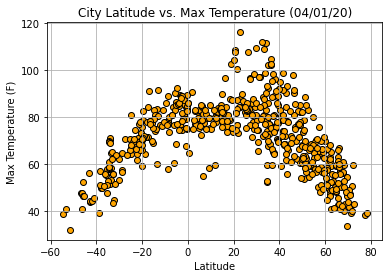

<Figure size 432x288 with 0 Axes>

In [13]:

#Creating plot
plt.scatter(clean_city_df["Latitude"], clean_city_df["Max Temp"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature (04/01/20)")
plt.show()
plt.savefig("City_Latitude_vs_Max_Temperature.png")

## Latitude vs. Humidity Plot

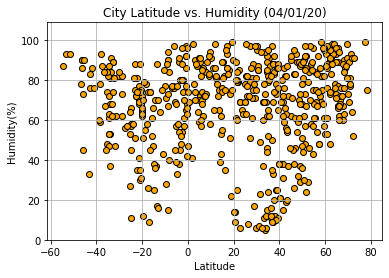

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Humidity"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.ylim(0, clean_city_df["Humidity"].max()+10)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity (04/01/20)")
plt.show()
plt.savefig("City_Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

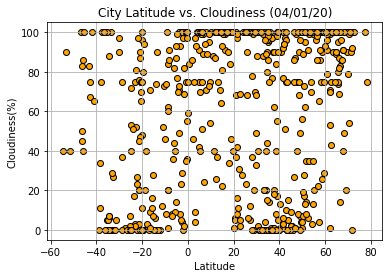

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(clean_city_df["Latitude"],clean_city_df["Cloudiness"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness (04/01/20)")
plt.show()
plt.savefig("City_Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

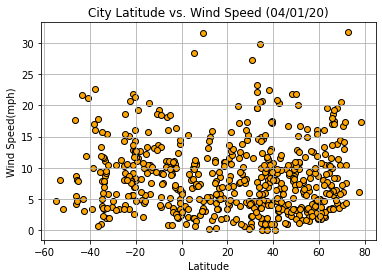

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Wind Speed"], marker = "o", color = "orange",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed (04/01/20)")
plt.show()
plt.savefig("City_Latitude_vs_Wind_Speed_.png")

## Linear Regression

In [17]:
N_Hemisphere = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
S_Hemisphere = clean_city_df.loc[clean_city_df["Latitude"] < 0]

In [18]:
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.66


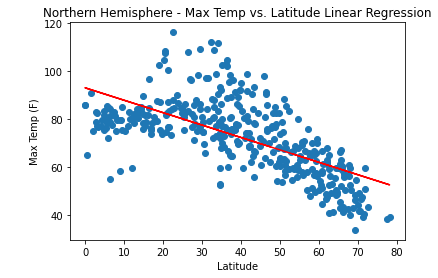

In [19]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Max Temp"])

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

annotate(equation, -20, 30)

plt.savefig("Northern_Hemisphere_Max Temp_vs_Latitude_Linear_Regression.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.86


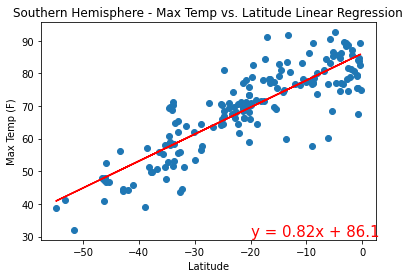

In [20]:
equation = linear_regression(S_Hemisphere["Latitude"],S_Hemisphere["Max Temp"])

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

annotate(equation, -20, 30)

plt.savefig("Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09


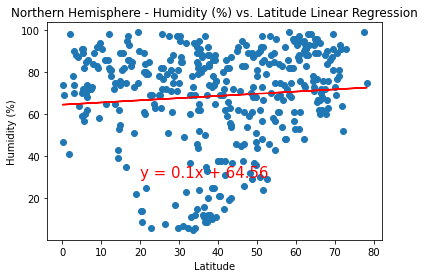

In [21]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Humidity"])

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

annotate(equation, 20, 30)

plt.savefig("Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.11


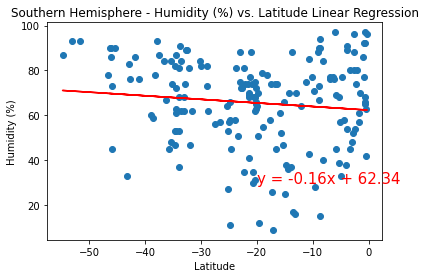

In [22]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Humidity"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

annotate(equation, -20, 30)

plt.savefig("Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.07


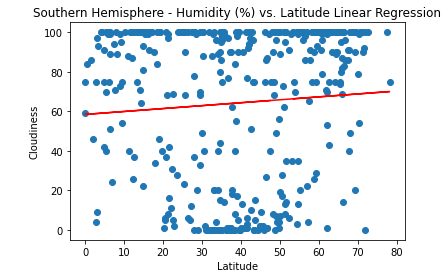

In [23]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Cloudiness"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

annotate(equation, -20, 30)

plt.savefig("Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.13


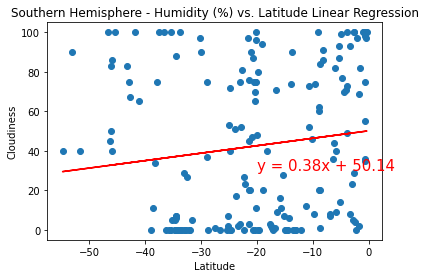

In [24]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Cloudiness"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

annotate(equation, -20, 30)

plt.savefig("Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


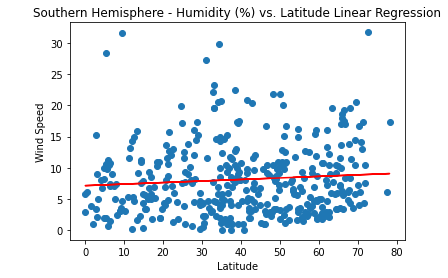

In [25]:
equation = linear_regression(N_Hemisphere["Latitude"], N_Hemisphere["Wind Speed"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

annotate(equation, -20, 30)

plt.savefig("Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.03


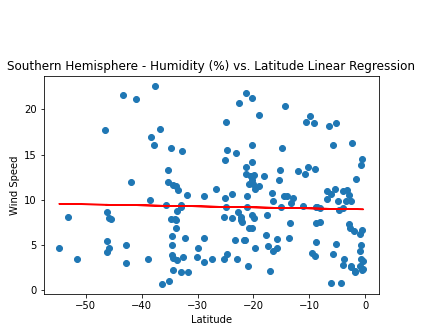

In [26]:
equation = linear_regression(S_Hemisphere["Latitude"], S_Hemisphere["Wind Speed"])

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

annotate(equation, -20, 30)

plt.savefig("Southern_Hemisphere_Wind Speed_vs_Latitude_Linear_Regression.png")